
# Project: Investigate a Medical Appointment Dataset 

#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whatever or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Introduction
This dataset contains information from 110.527 medical appointments collected from Brazil medical hospitals system. It was originally sourced from Kaggle. It predicts whatever the pacient would miss their appoiments based on some demographic information factors.  It contains 14 associated variables (characteristics) that are demographic information, as well as whatever or not the patient received SMS notification. The most important one is if the patient show up or no to the scheduled appointment.

## Research questions:
<ul>
      <li>What is the overall appointment show-up vs. no show-up rate?</li>
      <li>Are SMS notified patients more likely to show up on their appointment?</li>
      <li>Is age indicative of whatever a patient will make their appointments?</li>
      <li>Is gender an indicative of whatever a patient will make their appointments?</li>
      <li>What are the locations areas with the most number of show up for appointments</li>
      <li> Do some days of the week have more no shows than others?</li>
        </ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import datetime

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Pandas libraries are used for reading the data into "df" file dataframe and it will display first 8 rows to allow us for a detailed look on data.

In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes


Now let's obtain information about medical Appointment dataset colums,rows and datatypes!

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

The Medical Appointment Dataset has 110527 entries and a total of 14 columns.There are also no non-null fields.

In [5]:
#Checking for null values
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

As we cam see there are no nulls values so isn't necessary to make modifications on this part.

In [6]:
# Check if there are duplicates data in the data 
print("Number of dublicates entries : ", + sum(df.duplicated()))

Number of dublicates entries :  0


In [7]:
# Check to see if  there are unique patient and appointment IDs
df[['AppointmentID','PatientId']].nunique()

AppointmentID    110527
PatientId         62299
dtype: int64

As we cand see the AppointmentID are correct as there are the same number as rows. The  PatientId are less than the rows meaning that some patients have came back many times.

We now check the number of gender balance that have done medical appointments. 

In [8]:
number_males = df.Gender.str.count('M').sum()
print('Number of males in the medical dataset:', number_males)

Number of males in the medical dataset: 38687


In [9]:
number_females = df.Gender.str.count('F').sum()
print('Number of females in the medical dataset:', number_females)

Number of females in the medical dataset: 71840


Assigning to 'males' and 'females' the values from 'Gender' column.

In [10]:
males = df.Gender == 'M'

In [11]:
females = df.Gender == 'F'

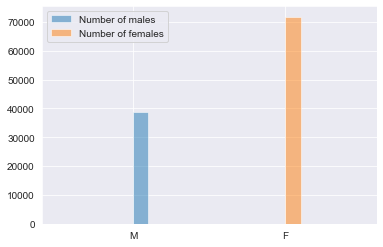

In [12]:
df.Gender[males].hist(alpha= 0.5 , label = 'Number of males' )
df.Gender[females].hist(alpha= 0.5 , label = 'Number of females')
plt.legend()

From this information and histogram graph chart we see that female is the greater proportion meaning that women takes significantly more care of they health in comparison to man.

The next operation return the names of columns for medical dataset.

In [13]:
print(list(df.columns.values))

['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


As we can see there are some mistakes in naming some columns like 'Handcap','No-show','Hipertension' and 'No-show'. We will rename them in the next Data Cleaning chapter. 

### Data Cleaning 
After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section

We first rename the 'Handcap','Neighbourhood',Hipertension, and 'No-show' columns name to correct name, for a  for proper use of their names.

In [14]:
df.rename(columns = {'Handcap': 'Handicap','No-show':'Noshow','Neighbourhood':'Location', 'Hipertension':'Hypertension',}, inplace = True)

In [15]:
#checking to make sure if the changes are correctly done, showing only  the  names of the columns.
df.head(0)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow


We will now check if there are incorrect age groups that are less or equal to `0` and more than `100`. Statisticaly there is a very low chance to have more people with an age more than `100 ` years

In [16]:
#Check to how many patients are under or equal to 0 age
df[df["Age"] <= 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3540 entries, 59 to 110507
Data columns (total 14 columns):
PatientId         3540 non-null float64
AppointmentID     3540 non-null int64
Gender            3540 non-null object
ScheduledDay      3540 non-null object
AppointmentDay    3540 non-null object
Age               3540 non-null int64
Location          3540 non-null object
Scholarship       3540 non-null int64
Hypertension      3540 non-null int64
Diabetes          3540 non-null int64
Alcoholism        3540 non-null int64
Handicap          3540 non-null int64
SMS_received      3540 non-null int64
Noshow            3540 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 414.8+ KB


In [17]:
#Check to how many patients have more than 100 years old age
df[df["Age"] > 100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 58014 to 97666
Data columns (total 14 columns):
PatientId         7 non-null float64
AppointmentID     7 non-null int64
Gender            7 non-null object
ScheduledDay      7 non-null object
AppointmentDay    7 non-null object
Age               7 non-null int64
Location          7 non-null object
Scholarship       7 non-null int64
Hypertension      7 non-null int64
Diabetes          7 non-null int64
Alcoholism        7 non-null int64
Handicap          7 non-null int64
SMS_received      7 non-null int64
Noshow            7 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 840.0+ bytes


In total there are 3540 entries with patients under or equal to 0 and 7 patients with more than 100 year old age.
We will do a cleaning process to make sure there are no problems with the age group of the patients. I put the source of each code below find on the internet.

In [18]:
# Deleting all rows for which column 'Age' has value more than 100
# Source : https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
indexNames = df[df['Age'] > 100].index    
df.drop(indexNames , inplace=True)

In [19]:
# Replacing all 0 and -1 Age group in a column dataframe with column's median value
#Source https://stackoverflow.com/questions/53397162/replacing-all-0s-in-a-column-in-python-dataframe-with-columns-median-value-chan
df['Age'].replace(to_replace=0, value = df['Age'].median(), inplace = True)
df['Age'].replace(to_replace=-1, value = df['Age'].median(), inplace = True)

In [20]:
# Check to see if the  results are correct and there are any rows left.
df[df["Age"] > 100].head()
df[df["Age"] <= 0].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow


<a id='eda'></a>
## Exploratory Data Analysis
Now that we have an image about the data and we done an important cleaning we are ready to explore and compare data that we have been offered and  to do an do a thorough analysis by asking three research questions.

### Research Question 1 (What is the overall appointment show-up vs. no show-up rate?)
Here we investigate the proportion of missed appointments vs those who patients show up using a plot pie chart graph.

In [21]:
#Showing first the number of the patients that show up or not at their appointments.
df['Noshow'].value_counts()

No     88204
Yes    22316
Name: Noshow, dtype: int64

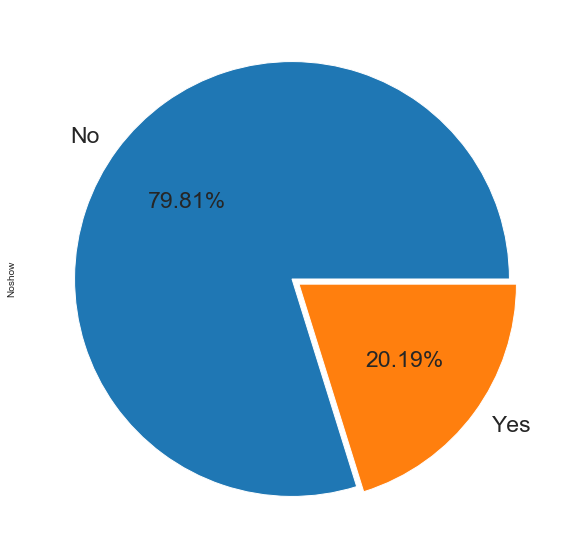

In [22]:
#Creating a graphic chart that better represent the percentage of show up patients
df.Noshow.value_counts().plot.pie(figsize=(10,10),autopct='%.2f%%',fontsize = 23, explode=(0,0.04))
plt.show()

As we can see , we have an larger proportion of patients who didn't show up.

### Research Question 2 (Are SMS notified patients more likely to show up on their appointment?) 

In [23]:
# Calculate show up percentage of patients notified by SMS
sms_received = df.query('SMS_received == 1')
no_sms_received = df.query('SMS_received == 0')

In [24]:
received_showedup = sms_received.groupby('Noshow')['AppointmentID'].count()
noreceived_showedup = no_sms_received.groupby('Noshow')['AppointmentID'].count()

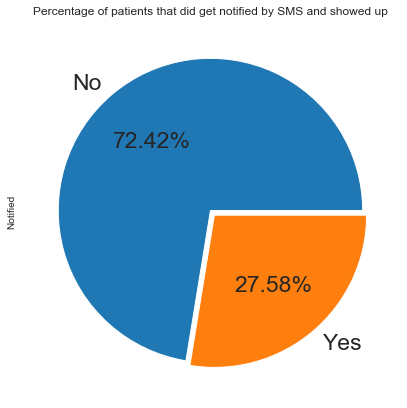

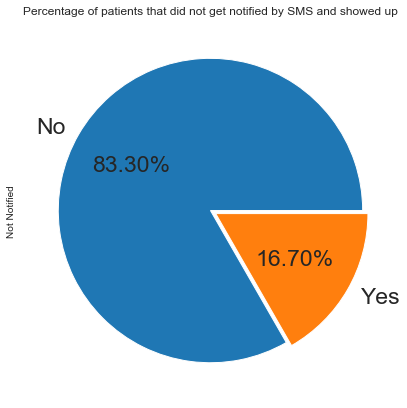

In [25]:
# Percentage chart by plot pie
received_showedup.plot(kind='pie', figsize=(9, 7),autopct='%.2f%%',fontsize = 23, explode=(0,0.04))
plt.title('Percentage of patients that did get notified by SMS and showed up')
plt.ylabel('Notified')
plt.show();
noreceived_showedup.plot(kind='pie', figsize=(9, 7),autopct='%.2f%%',fontsize = 23, explode=(0,0.04))
plt.title('Percentage of patients that did not get notified by SMS and showed up')
plt.ylabel('Not Notified')
plt.show();

We can see that the patients notified by SMS come come more than those who didn't get notified

### Research Question 3  (Is age indicative of whatever a patient will make their appointments?)

In this  research question I explore if there is a connection between the age of the patients and the show up at the appoitments.

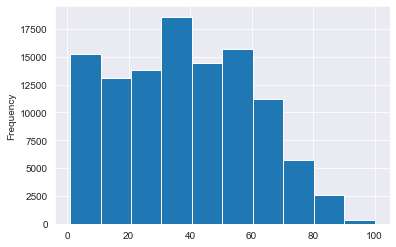

Mean age: 38


In [26]:
#A histogram allows visualization of the distribution of the patient ages.
df.Age.plot.hist()
plt.show()
mean_age = df.Age.mean()
# print the mean age for extra information
print('Mean age: {:.0f}'.format(mean_age))

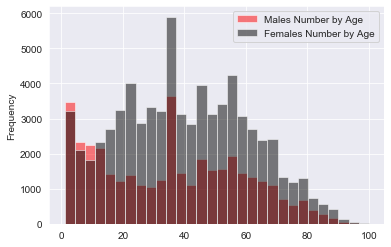

In [27]:
#A histogram allows visualization of the distribution of the female or males patient ages.
df.Age[males].plot.hist(alpha= 0.5 ,bins=30, label = 'Males Number by Age', color = 'red')
df.Age[females].plot.hist(alpha= 0.5 ,bins=30, label = 'Females Number by Age', color = 'black')
plt.legend()
plt.show()

In [28]:
# Assigning values of 'Yes' and 'No' to the showed and notshowed variables.
notshowed = (df.Noshow == 'No')
showed = (df.Noshow == 'Yes')

In [29]:
print('Mean Age for show up Appointments:{:.2f}'.format(df[showed].Age.mean()))
print('Mean Age for not showed Appointments:{:.2f}'.format(df[notshowed].Age.mean()))

Mean Age for show up Appointments:35.37
Mean Age for not showed Appointments:39.00


As we can see there is a Mean age of 39 years for people that show up to their appointments and 35.37 for people who missed theire appoinments.

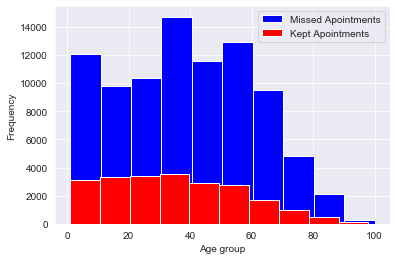

In [30]:
#A histogram that allows visualization of the distribution of kept apointments and missed apointments 
#by considering age group
df[notshowed].Age.plot.hist( color= 'blue')
df[showed].Age.plot.hist( color= 'red')
plt.legend([ 'Missed Apointments','Kept Apointments'])
plt.xlabel('Age group')
plt.show()

### Research Question 4 (Is Gender an  indicative of whatever a patient will make their appointments?)

We first transform the values in the Noshow column for the plot bar, into integers.

In [31]:
fshow  = {'No': 0,'Yes': 1} 

In [32]:
df.Noshow  = [fshow[item] for item in df.Noshow] 

In [33]:
df.groupby('Gender').Noshow.mean()

Gender
F    0.203124
M    0.199679
Name: Noshow, dtype: float64

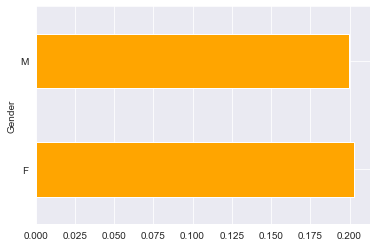

In [34]:
# I used an horizontal line to better show  the correlation between genders show up 
df.groupby(['Gender']).Noshow.mean().plot.barh(stacked=True, color = 'orange');

### Research Question 5  (What are the locations with the most number of show up for appointments)

In [35]:
# Create two different dataframes contining show and no show data
showup = df.query('Noshow == 1')
noshowup = df.query('Noshow == 0')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


Text(0.5, 0, 'Show')

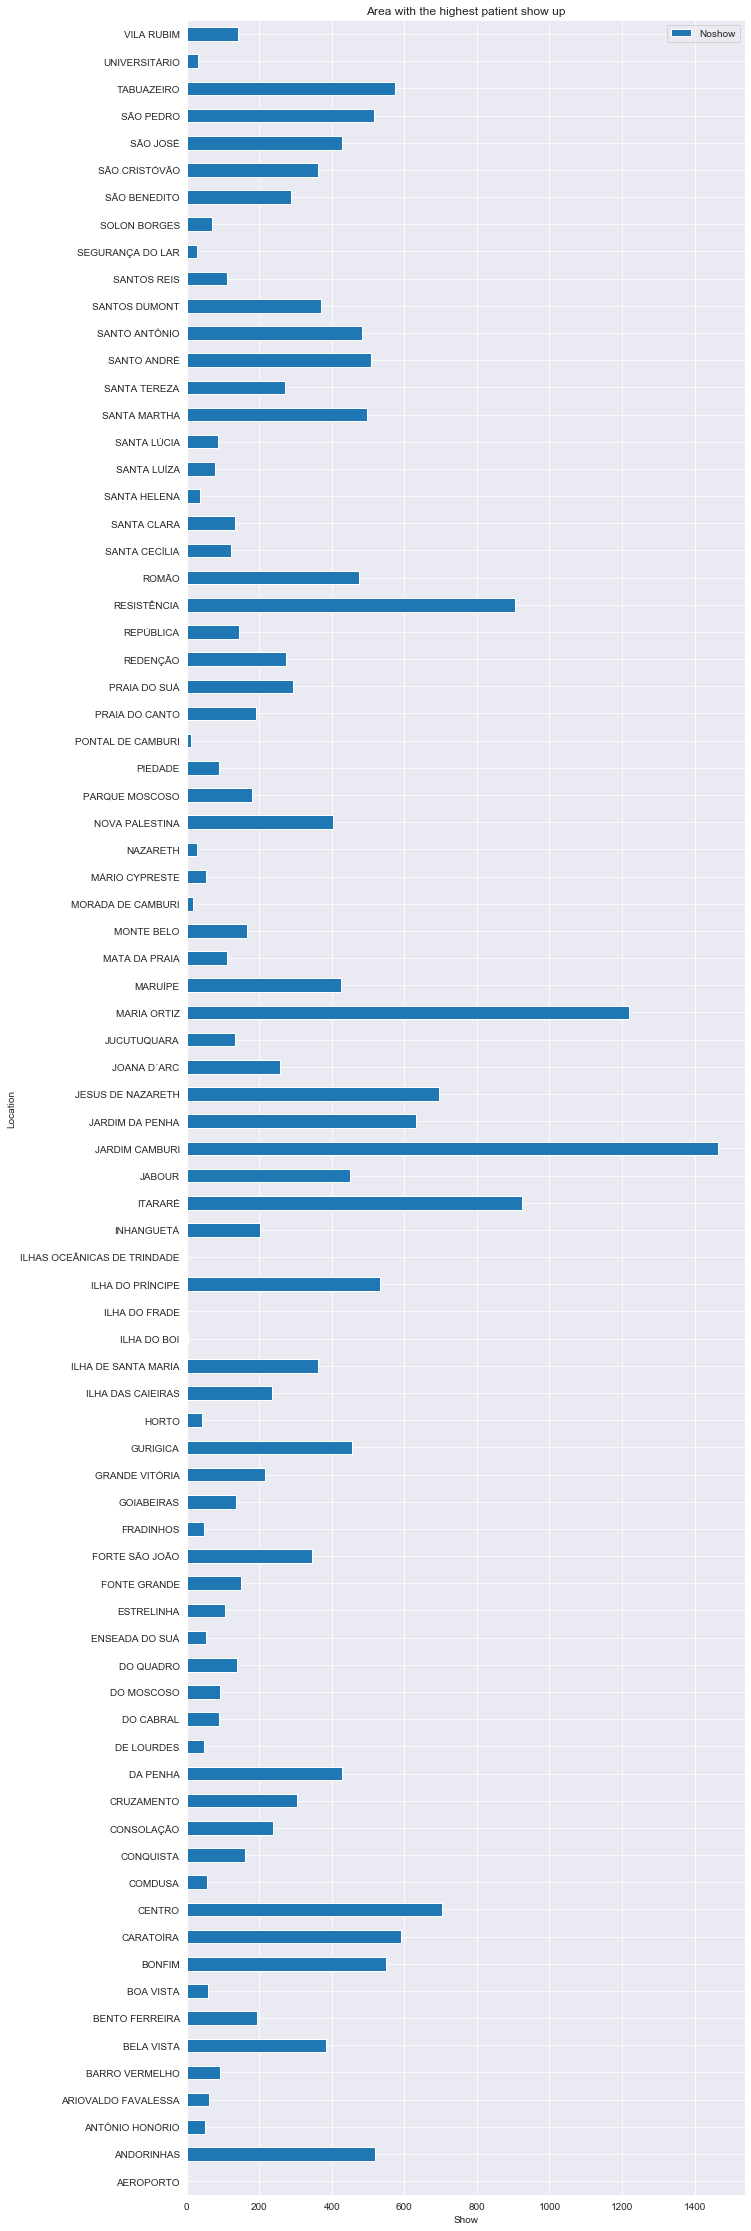

In [36]:
df_location = showup[['Location','Noshow']]
group_location=df_location.groupby('Location').sum()
group_location.plot.barh(figsize=(10,40))
plt.title('Area with the highest patient show up')
plt.xlabel('Show')

As we can see the location with the highest number of appointments  honor was 'Jardin Camburi'.

### Research Question 6 (Do some days of the week have more no shows than others?)

In [37]:
# Transforming ScheduledDay and AppointmentDay into datetime objects and stripping hours, minutes and seconds.
dt_scheduledDay =  pd.to_datetime(df.ScheduledDay).dt.date
dt_appointmentDay = pd.to_datetime(df.AppointmentDay).dt.date

# Storing "delta_days" to df as a new feature
df['Days_delta'] = (dt_appointmentDay - dt_scheduledDay).dt.days
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,Days_delta
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


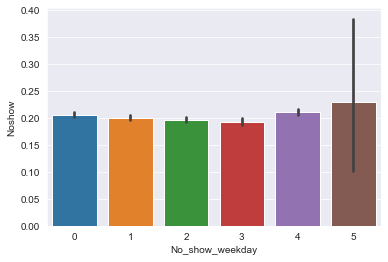

In [42]:
# Changing AppointmentDay to a datetime pandas object to create a new dayofweek engineered feature
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['No_show_weekday'] = df['AppointmentDay'].dt.dayofweek
df['No_show_weekday'].sample(5)
sns.barplot(y='Noshow', x='No_show_weekday', data=df)

<a id='conclusions'></a>
## Conclusions


 I the Medical Appointment Dataset there can be seen, some mistakes in naming some columns that have been subsequently corrected in the Data Cleaning process as well as  those patients who have incorrect age number, bellow or equal to zero or above 100. In the dataset process analysis of the 'csv' file it has been used pandas,matplotlib, seaborn and numpy libraries. The dataset has 110527 entries and 14 columns with no nulls values.
 From the dataset it can be seen that are way more canceled appointmens that are those where patients showed up.  We can see that are more women than men with appointments but there are almost equally cases of canceled appointments in both gender groups.As we can see the gender is not an very clear indicative for missed or show up appointments, because although women were missing more than men from appointments, the values are almost equal.In the age group there is a mean proportion of 39 years for people that show up to their appointments and 35.37 for people who missed theire appoinments. By the Neighbourhood area it can be seen that the highest number of appointments honor was 'Jardin Camburi', nut we don't know why 'Jardin Camburi' has an higher number of patients that show up, with no reference being made anywhere to the economic status of that neighborhood.Also the patients that where notified by SMS  have a more likely probability of honoring their appointments.
  I think an additional column is needed for phone confirmations, via sms or email in order to better analyze the data. 

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template No-show appointments.ipynb'])

0